In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'

os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
def show_images(images, scores, test_artist, train_artists):
    n: int = len(images)
    f = plt.figure(figsize=(16, 2))
    for i in range(n):
        # Debug, plot figure
        ax = f.add_subplot(1, n, i + 1)
        if i==0:
            pass
            ax.title.set_text(test_artist)
        else:
            ax.title.set_text(str(np.round(scores[i-1], 4))+'\n'+train_artists[i-1])
            ax.axis('off')
        if images[i]==None:
            pass
        else:
            plt.imshow(images[i])

    plt.show(block=True)

In [4]:
from datasets import load_dataset

In [5]:
import pickle

In [6]:
with open('../../data/indices/5000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

5000

In [7]:
with open('../../data/indices/5000-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

In [8]:
import pandas as pd
df = pd.read_csv('../../../../codes/celeba/data/celeba/list_eval_partition.txt', delimiter=" ", 
                 names=['path', 'split'],
                 header=None, skipinitialspace=True)
df['path'] = df.apply(lambda x: "../../../../codes/celeba/data/celeba/img_align_celeba/{}".format(x['path']), axis=1)
df.head()    

,path,split
0,../../../../codes/celeba/data/celeba/img_align...,0
1,../../../../codes/celeba/data/celeba/img_align...,0
2,../../../../codes/celeba/data/celeba/img_align...,0
3,../../../../codes/celeba/data/celeba/img_align...,0
4,../../../../codes/celeba/data/celeba/img_align...,0


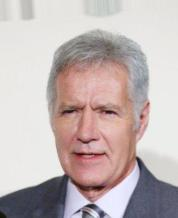

In [9]:
from datasets import Dataset, load_dataset, Image

train_dataset = Dataset.from_dict({"img": df.loc[idx_train]['path'].tolist(),
                                  }).cast_column("img", Image())
train_dataset[0]["img"]

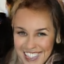

In [10]:
import pandas as pd
df = pd.DataFrame()
df['path'] = ['{}/{}.png'.format('../../saved/5000-0.5/gen', i) for i in range(1000)]

from datasets import DatasetDict, Dataset, load_dataset, Image
dataset = DatasetDict({
"train": Dataset.from_dict({
    "img": df['path'].tolist(),
}).cast_column("img", Image()),})
gen_dataset = dataset["train"]
gen_dataset[0]["img"]

In [73]:
from sklearn.model_selection import train_test_split
_, test_index = train_test_split(range(1000), test_size=60, random_state=0)
test_index

[993,
 859,
 298,
 553,
 672,
 971,
 27,
 231,
 306,
 706,
 496,
 558,
 784,
 239,
 578,
 55,
 906,
 175,
 14,
 77,
 31,
 481,
 310,
 311,
 883,
 788,
 45,
 103,
 760,
 1,
 823,
 710,
 614,
 790,
 408,
 736,
 957,
 366,
 918,
 267,
 230,
 996,
 635,
 698,
 251,
 783,
 819,
 141,
 316,
 587,
 331,
 295,
 262,
 432,
 862,
 582,
 272,
 270,
 987,
 319]

In [74]:
with open("../../data/indices/5000-0.5/counter/idx-gen-sampled.pkl", 'wb') as handle:
    pickle.dump(test_index, handle)

In [75]:
test_index

[993,
 859,
 298,
 553,
 672,
 971,
 27,
 231,
 306,
 706,
 496,
 558,
 784,
 239,
 578,
 55,
 906,
 175,
 14,
 77,
 31,
 481,
 310,
 311,
 883,
 788,
 45,
 103,
 760,
 1,
 823,
 710,
 614,
 790,
 408,
 736,
 957,
 366,
 918,
 267,
 230,
 996,
 635,
 698,
 251,
 783,
 819,
 141,
 316,
 587,
 331,
 295,
 262,
 432,
 862,
 582,
 272,
 270,
 987,
 319]

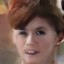

In [76]:
gen_dataset[test_index[0]]['img']

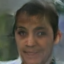

In [77]:
gen_dataset[test_index[1]]['img']

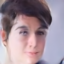

In [78]:
gen_dataset[test_index[2]]['img']

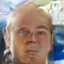

In [79]:
gen_dataset[test_index[3]]['img']

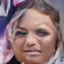

In [80]:
gen_dataset[test_index[4]]['img']

In [81]:
scores_list = []

In [82]:
with open("gen_5000_0.5_loss_100_5000000.0_0.14938357625426477.pkl", 'rb') as handle:
    scores = pickle.load(handle)
scores_list.append(scores)
scores.shape

(1000, 5000)

In [83]:
with open("gen_5000_0.5_mean-squared-l2-norm_100_5000000.0_0.21735084378640995.pkl", 'rb') as handle:
    scores = pickle.load(handle)
scores_list.append(scores)
scores.shape

(1000, 5000)

In [84]:
# load ground truth
my_list = [
    0,1,2,3,
    4,5,6,7,
    8,9,10,11,
    12,13,14,15,
    16,17,18,19,
    20,21,22,23,
    24,25,26,27,
    28,29,30,31,
    32,33,34,35,
    36,37,38,39,
    40,41,42,43,
    44,45,46,47,
    48,49,50,51,
    52,53,54,55,
    56,57,58,59,
    60,61,62,63,
          ]

In [85]:
loss_array_list = []

for i in my_list:
    for seed in [
        0,
                 1,
                 2,
                 # 3,
                 # 4,
                ]:
        for e_seed in [
            0, 
                       1, 
                       2
                      ]:
            with open('../../saved/5000-0.5/lds-val/ddpm-sub-{}-{}/e-{}-gen.pkl'.format(i, seed, e_seed), 'rb')  as handle:
                loss_list = pickle.load(handle)
            margins = np.concatenate(loss_list, axis=-1) # -logp
            ####
            if (seed==0) and (e_seed)==0:
                loss_array = margins
            else:
                loss_array += margins
            
    loss_array = loss_array/(3*3)
    
    loss_array_list.append(loss_array)
lds_loss_array = np.stack(loss_array_list)
lds_loss_array.shape

(64, 1000, 1000)

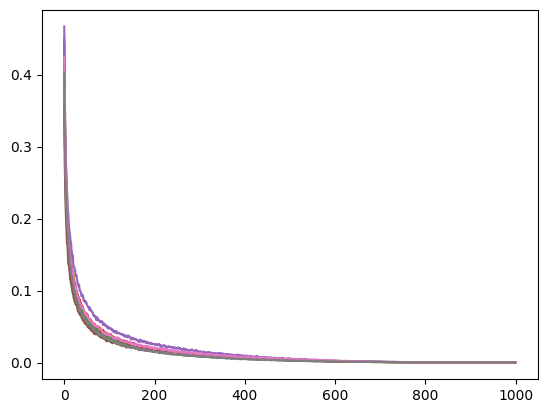

In [86]:
for i in range(1):
    for j in range(8):
        plt.plot(lds_loss_array[i, :, j], color="C{}".format(j))
    # break

In [87]:
mask_array_list = []

for i in my_list:
    # print(i)
    with open('../../data/indices/5000-0.5/lds-val/sub-idx-{}.pkl'.format(i), 'rb')  as handle:
        sub_idx_train = pickle.load(handle)
    # print(len(sub_idx_train))
    mask_array = np.in1d(idx_train, sub_idx_train)
        
    mask_array_list.append(mask_array)
    
lds_mask_array = np.stack(mask_array_list)
lds_mask_array.shape

(64, 5000)

In [88]:
lds_testset_correctness = lds_loss_array.mean(axis=1)
lds_testset_correctness.shape

(64, 1000)

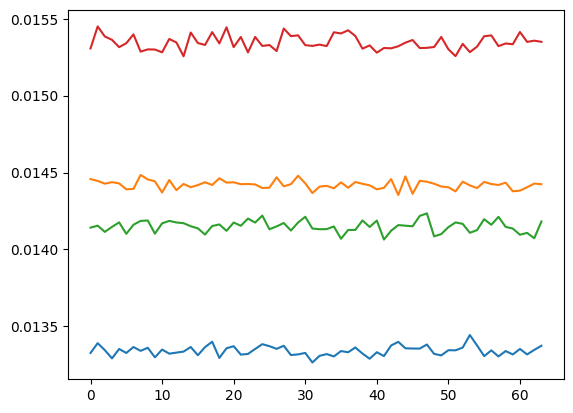

In [89]:
for j in range(4):
    plt.plot(lds_testset_correctness[:, j], color="C{}".format(j))
    # break
# plt.ylim(0.15, 0.2)

In [90]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[0]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

# tmp_1 = rs

Correlation: 0.149 (avg p value 0.322115)


In [91]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[0]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in test_index:
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

tmp_1 = rs

Correlation: 0.139 (avg p value 0.304911)


In [92]:
tmp_1

array([ 0.35320513,  0.0834707 ,  0.03150183,  0.07490842,  0.10448718,
        0.11149267,  0.14615385,  0.00444139,  0.15393773, -0.09546703,
        0.19020147,  0.19249084,  0.30540293,  0.23795788,  0.37122678,
       -0.14322344, -0.03878205,  0.1706044 ,  0.22394689,  0.22486264,
        0.18218864,  0.13067766,  0.04065934,  0.08406593,  0.16776557,
        0.2275641 , -0.01836081,  0.21895604,  0.08191392,  0.20338828,
        0.02596184,  0.14157509,  0.10549451,  0.133837  ,  0.15444139,
        0.33141026,  0.32284799,  0.13763736,  0.20845019,  0.13402015,
        0.32971612,  0.02541209,  0.2014652 ,  0.08150183,  0.08598901,
        0.23237179,  0.12129121, -0.17028388,  0.20746337,  0.14052198,
        0.42774725,  0.18466117,  0.09065934, -0.01845238,  0.18054029,
        0.18882784,  0.11414835,  0.12600733, -0.14171245,  0.2114011 ])

In [93]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[1]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

# tmp_2 = rs

Correlation: 0.217 (avg p value 0.192988)


In [94]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[1]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in test_index:
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

tmp_2 = rs

Correlation: 0.240 (avg p value 0.148755)


In [95]:
tmp_2

array([ 0.11804029,  0.18576007,  0.20027473,  0.33466117,  0.37957875,
        0.37358059,  0.08415751,  0.20778388, -0.00563187,  0.19180403,
        0.40077839,  0.27284799,  0.43223443,  0.41419414,  0.18019895,
        0.21195055,  0.38772894,  0.29945055,  0.19468864,  0.35691392,
        0.3040293 ,  0.2467033 ,  0.27083333, -0.00604396,  0.18205128,
        0.36781136,  0.13388278,  0.27403846,  0.41451465,  0.24281136,
        0.25394064,  0.291163  ,  0.22495421,  0.26959707,  0.25343407,
        0.32655678,  0.27380952,  0.21987179,  0.26103779,  0.21717033,
        0.31630037,  0.25448718,  0.14624542,  0.02467949,  0.35819597,
        0.20389194,  0.13827839, -0.04528388,  0.23150183,  0.29340659,
        0.31346154,  0.15192308,  0.39194139,  0.13191392,  0.13049451,
        0.04739011,  0.26620879,  0.21822344,  0.19020147,  0.37838828])

In [96]:
scores_list[0][test_index].shape

(60, 5000)

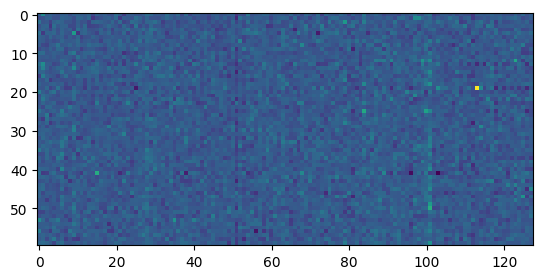

In [97]:
plt.imshow(scores_list[0][test_index][:, 0:128])

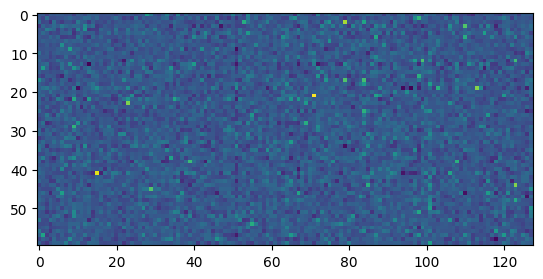

In [98]:
plt.imshow(scores_list[1][test_index][:, 0:128])

In [99]:
np.random.seed(42)
scores_list.append(np.random.rand(1000, 5000))
len(scores_list)

3

In [100]:
for index, my_i in enumerate(test_index):
    print(index, my_i)
    for k in [
        # 250, 
        500, 1000, 2500, 
              # 5000
             ]:
        D_trak=-scores_list[0][my_i]
        topK_trak = np.arange(10000)[D_trak.argsort()[0:k]]

        D_ours=-scores_list[1][my_i]
        topK_ours = np.arange(10000)[D_ours.argsort()[0:k]]

        ####
        D_random=-scores_list[2][my_i]
        topK_random = np.arange(10000)[D_random.argsort()[0:k]]
        ####

        # print(len(np.intersect1d(topK_trak, topK_ours)))
        # print(len(np.union1d(topK_trak, topK_ours)))
        print(len(np.intersect1d(topK_trak, topK_ours))/len(np.union1d(topK_trak, topK_ours))) # Jaccard similarity

        ####
        new_idx_trak = np.delete(idx_train, topK_trak)
        # print(len(new_idx_trak))
        print(new_idx_trak[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-TRAK.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_trak, handle)
        ####
        new_idx_ours = np.delete(idx_train, topK_ours)
        # print(len(new_idx_ours))
        print(new_idx_ours[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-Ours.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_ours, handle)
        ####
        new_idx_random = np.delete(idx_train, topK_random)
        # print(len(new_idx_random))
        print(new_idx_random[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-Random.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_random, handle)

0 993
0.20048019207683074
[ 48803 118843  86803 153263  45256]
[ 48803  28992 118843  86803 153263]
[ 28992 118843  86803 153263  45256]
0.22249388753056235
[ 48803 118843  86803 153263  45256]
[ 48803  28992 118843  86803 153263]
[ 28992  86803 153263  45256  51033]
0.4212620807276862
[153263  45256   5543  87592 121585]
[118843 153263  21067 113985  43169]
[ 28992 153263  51033   5543 113985]
1 859
0.19474313022700118
[ 48803  28992 118843  86803 153263]
[ 48803  28992  86803 153263  45256]
[ 48803  28992 118843  86803 153263]
0.23304562268803947
[ 48803  28992 118843  86803 153263]
[ 48803  28992  86803 153263  45256]
[ 48803  28992 118843  86803  45256]
0.43225436837582354
[ 48803  28992 153263  45256 113985]
[ 48803  28992  86803 153263  45256]
[48803 28992 86803 45256 21067]
2 298
0.18203309692671396
[ 28992 118843  86803 153263  45256]
[ 48803  28992 118843  86803 153263]
[ 28992 118843  86803 153263  51033]
0.2084592145015106
[ 28992 118843  86803 153263  51033]
[ 28992 118843 